In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [3]:
df = pd.read_csv('D:\Learn Python for Data Analysis\PYTHON_EXERCISES_LUKE\job_postings_flat_from_luke.csv')

<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:1: SyntaxWarning: invalid escape sequence '\L'
C:\Users\User\AppData\Local\Temp\ipykernel_16500\1597464850.py:1: SyntaxWarning: invalid escape sequence '\L'
  df = pd.read_csv(r'D:\Learn Python for Data Analysis\PYTHON_EXERCISES_LUKE\job_postings_flat_from_luke.csv')


In [27]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Data Analyst,Data Analyst,"New York, NY",via CareerBuilder,Full-time,False,"New York, United States",2023-01-01 00:00:04,False,False,United States,NaN,NaN,NaN,Metasys Technologies,"['sql', 'snowflake', 'visio', 'jira', 'conflue...","{'analyst_tools': ['visio'], 'async': ['jira',..."
1,Data Analyst,Data Analyst,"Washington, DC",via CareerBuilder,Full-time,False,"New York, United States",2023-01-01 00:00:22,False,True,United States,NaN,NaN,NaN,Guidehouse,"['sql', 'python', 'r', 'azure', 'snowflake', '...","{'analyst_tools': ['tableau', 'excel'], 'cloud..."
2,Data Analyst,Data Analyst,"Fairfax, VA",via CareerBuilder,Full-time,False,"New York, United States",2023-01-01 00:00:24,False,False,United States,NaN,NaN,NaN,Protask,"['sql', 'jira']","{'async': ['jira'], 'programming': ['sql']}"
3,Senior Data Analyst,Senior Data Analyst / Platform Experience,"Worcester, MA",via LinkedIn,Full-time,False,"New York, United States",2023-01-01 00:00:27,False,True,United States,NaN,NaN,NaN,Atria Wealth Solutions,"['sql', 'atlassian', 'jira']","{'async': ['jira'], 'other': ['atlassian'], 'p..."
4,Data Analyst,Data Analyst,"Sunnyvale, CA",via CareerBuilder,Full-time,False,"California, United States",2023-01-01 00:00:38,False,False,United States,NaN,NaN,NaN,"ICONMA, LLC","['sql', 'python']","{'programming': ['sql', 'python']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615925,Data Scientist,Tutor-Reviewer For Data Science Program,"San Salvador, El Salvador",Dr. Job,Full-time,False,El Salvador,2025-06-30 07:08:26,True,False,El Salvador,NaN,NaN,NaN,TripleTen,"['python', 'sql']","{'programming': ['python', 'sql']}"
1615926,Data Engineer,DATA ENGINEER,"Abidjan, Côte d’Ivoire",LinkedIn,Full-time,False,Côte d'Ivoire,2025-06-30 07:11:05,False,False,Côte d'Ivoire,NaN,NaN,NaN,RED TIC,"['sql', 'nosql', 'mongodb', 'mongodb', 'python...","{'cloud': ['aws', 'azure', 'gcp', 'bigquery'],..."
1615927,Data Analyst,Data Analyst - Moldova,Anywhere,Yopeso Romania SRL,Full-time,True,Moldova,2025-06-30 07:11:10,False,False,Moldova,NaN,NaN,NaN,Yopeso Romania SRL,"['sql', 'python', 'aws', 'gcp', 'tableau', 'po...","{'analyst_tools': ['tableau', 'power bi', 'loo..."
1615928,Data Analyst,"Junior Data Analyst / Developer, Nature for Wa...","Internatsionalnaya, Kyrgyzstan",ClimateTechList,Full-time,False,Kyrgyzstan,2025-06-30 07:12:09,True,False,Kyrgyzstan,NaN,NaN,NaN,The Nature Conservancy,NaN,NaN


In [28]:
type(df['job_posted_date'][0])

str

In [30]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615930 entries, 0 to 1615929
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   job_title_short        1615930 non-null  object        
 1   job_title              1615928 non-null  object        
 2   job_location           1612402 non-null  object        
 3   job_via                1615916 non-null  object        
 4   job_schedule_type      1590879 non-null  object        
 5   job_work_from_home     1615930 non-null  bool          
 6   search_location        1615930 non-null  object        
 7   job_posted_date        1615930 non-null  datetime64[ns]
 8   job_no_degree_mention  1615930 non-null  bool          
 9   job_health_insurance   1615930 non-null  bool          
 10  job_country            1614805 non-null  object        
 11  salary_rate            82230 non-null    object        
 12  salary_year_avg        51026

In [ ]:
df['job_posted_date'].dt.year.value_counts()

job_posted_date
2023    787356
2024    483959
2025    344615
Name: count, dtype: int64

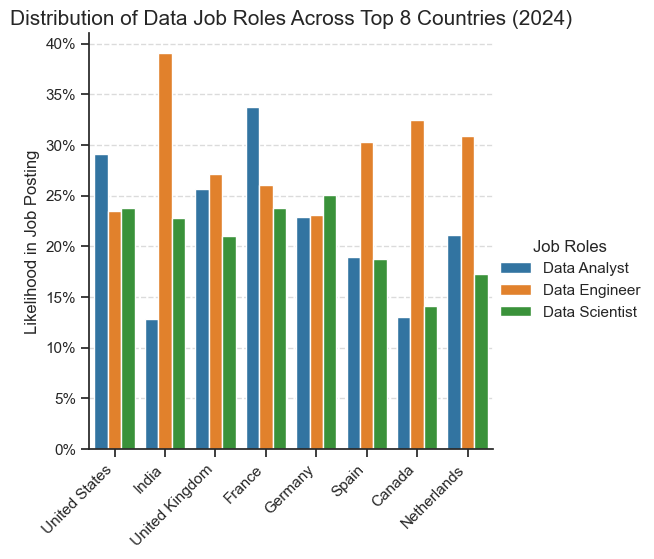

In [ ]:
# FINAL

from matplotlib.ticker import PercentFormatter

job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
top_n = 8

# Filter tahun 2024
df_2024 = df[df['job_posted_date'].dt.year == 2024]

# Hitung jumlah postingan per negara
df_country_cnt = (
    df_2024['job_country']
    .value_counts()
    .rename_axis('job_country') # gak ditulis juga gpp
    .reset_index(name='country_cnt')
)

# Ambil top-n negara
top_countries = df_country_cnt.head(top_n)['job_country']

# Filter berdasarkan job titles + top countries
df_filtered = df_2024[
    df_2024['job_title_short'].isin(job_titles) &
    df_2024['job_country'].isin(top_countries)
]

# Hitung jumlah per negara + job title
df_country_title = (
    df_filtered.groupby(['job_country', 'job_title_short'])
    .size()
    .reset_index(name='title_count')
)

# Merge dengan total count per negara
df_merged = df_country_title.merge(df_country_cnt, how='left', on='job_country')
df_merged['title_pct'] = 100 * df_merged['title_count'] / df_merged['country_cnt']

# Plot
sns.set_theme(style='ticks')

g = sns.catplot(
    data=df_merged,
    kind='bar',
    x='job_country',
    y='title_pct',
    hue='job_title_short',
    palette='tab10',
    order=top_countries
)
g._legend.set_title('Job Roles')
g._legend.set_loc('center right')

plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('Likelihood in Job Posting')
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.title(f'Distribution of Data Job Roles Across Top {top_n} Countries (2024)', fontsize=15)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

In [23]:
top_n = 5

# Hitung jumlah postingan per negara
df_country_cnt = (
    df_2024['job_country']
    .value_counts()
    .rename_axis('job_country')
    .reset_index(name='country_cnt')
)

df_country_cnt

,job_country,country_cnt
0,United States,142407
1,India,40200
2,United Kingdom,36340
3,France,23658
4,Germany,18521
...,...,...
155,Angola,17
156,Brunei,13
157,Maldives,11
158,Northern Mariana Islands,11


In [24]:
top_n = 5

# Hitung jumlah postingan per negara
df_country_cnt = (
    df_2024['job_country']
    .value_counts()
    .reset_index(name='country_cnt')
)

df_country_cnt

,job_country,country_cnt
0,United States,142407
1,India,40200
2,United Kingdom,36340
3,France,23658
4,Germany,18521
...,...,...
155,Angola,17
156,Brunei,13
157,Maldives,11
158,Northern Mariana Islands,11
